# APS 3

___

## <font style='font-family:Georgia' color='teal'> Estudo de uma treliça plana</font> 


####  <font style='font-family:Georgia' color='darkturquoise'> André Tavernaro || Antonio Fuziy || Gabriela Mitu || Gabriella Cukier</font> 

### Importando bibliotecas e valores

In [1]:
from funcoesTermosol import *
import numpy as np
import math

### Representação da estrutura

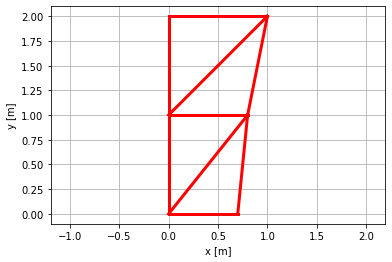

In [2]:
entrada = "entrada-PF.xlsx"

[nn,N,nm,Inc,nc,F,nr,R] = importa(entrada)

plota(N, Inc)
# geraSaida()

### Informações sobre a treliça

* nn: número de nós
* N: Matriz dos nós
* nm: número de membros
* Inc: Matriz de incidência. Colunas:
    1. Nó 1
    2. Nó 2
    3. E
    4. A
* nc: número de cargas
* F: forças (Vetor carregamento)
* nr: número de restrições
* R: Restrições (Vetor com os graus de liberdade)

In [3]:
# Comprimento 
L = 5
#numero de nodes
n = 8

### Gerando a matriz de conectividade transposta

In [4]:
C = []
for i in range(nm):
        C_i = nn*[0]

        no_1 = int(Inc[i, 0])
        no_2 = int(Inc[i, 1])

        C_i[no_1-1] = -1
        C_i[no_2-1] = 1
        C.append(C_i) 

C_t = np.array(C).T
C_t

array([[ 0, -1, -1, -1,  0,  0,  0,  0,  0],
       [-1,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, -1, -1, -1,  0,  0],
       [ 1,  0,  1,  0,  1,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, -1],
       [ 0,  0,  0,  0,  0,  0,  1,  1,  1]])

### Matriz dos membros (M)

In [5]:
M = np.matmul(N, C_t)
print(M)

[[0.1 0.  0.8 0.7 0.8 0.  1.  0.2 1. ]
 [1.  1.  1.  0.  0.  1.  1.  1.  0. ]]


### Obtendo Se, Ke e Kg

In [6]:
len_linhas_M = len(M)
len_linhas_C = len(C_t)
Kg = np.zeros((nn*2, nn*2))
for i in range(0, nm):
    E = Inc[i,2]
    A = Inc[i,3]
    
    n1 = Inc[i,0]
    n2 = Inc[i,1]
    
    x1 = N[0][int(Inc[:,0][i])-1]
    y1 = N[1][int(Inc[:,0][i])-1]
    x2 = N[0][int(Inc[:,1][i])-1]
    y2 = N[1][int(Inc[:,1][i])-1]    
    
    L = math.sqrt(((x1-x2)**2+(y1-y2)**2))
    
    const = E*A/L
    
    M_aux = M[:,i]
    M_aux.shape = [len_linhas_M, 1]
    M_aux2 = np.transpose(M_aux)
    Se = (const * np.matmul(M_aux, M_aux2)) / (np.linalg.norm(M[:,i])**2)

    C_aux = C_t[:,i]
    C_aux.shape = [len_linhas_C, 1]
    C_aux2 = np.transpose(C_aux)
    
    multi_C_aux = np.matmul(C_aux, C_aux2)
    Ke = np.kron(multi_C_aux, Se)
    Kg += Ke
# print(Se)
print(Kg)

[[ 2.57291597e+08  5.65426164e+07 -2.12057504e+08  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -4.52340931e+07 -5.65426164e+07
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.65426164e+07  2.19118523e+08  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.48440253e+08 -5.65426164e+07 -7.06782705e+07
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.12057504e+08  0.00000000e+00  2.13519916e+08  1.46241161e+07
   0.00000000e+00  0.00000000e+00 -1.46241161e+06 -1.46241161e+07
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.46241161e+07  1.46241161e+08
   0.00000000e+00  0.00000000e+00 -1.46241161e+07 -1.46241161e+08
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.38031871e+08  5.24815547e+07 -1.85550316e+08  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -5.24815547e+07 -5.24815547e+07]
 [ 0.

### Deslocamento nodal

Aplicando as condições de contorno para a matriz das forças:

In [7]:
F_c = np.delete(F, R.astype(int))
F_c


array([0., 0., 0., 0., 0., 0., 0., 1.])

Aplicando as condições de contorno para a matriz da rigidez:

In [8]:
Kg_c = np.delete(Kg, R.astype(int),0)
Kg_c = np.delete(Kg_c, R.astype(int), 1)
Kg_c

array([[ 2.38031871e+08,  5.24815547e+07, -1.85550316e+08,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -5.24815547e+07, -5.24815547e+07],
       [ 5.24815547e+07,  3.49362060e+08,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.48440253e+08,
        -5.24815547e+07, -5.24815547e+07],
       [-1.85550316e+08,  0.00000000e+00,  2.37845192e+08,
         9.91585869e+07,  0.00000000e+00,  0.00000000e+00,
        -5.59837090e+06, -2.79918545e+07],
       [ 0.00000000e+00,  0.00000000e+00,  9.91585869e+07,
         3.56878704e+08,  0.00000000e+00,  0.00000000e+00,
        -2.79918545e+07, -1.39959273e+08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.48440253e+08,  0.00000000e+00,
        -1.48440253e+08,  0.00000000e+00],
       [ 0.00000000e+00, -1.48440253e+08,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.48440253e+08,
         0.00000000e+00,  0.00000000e+00],
       [-5.24815547e+07, -5.248155

___
**Funções de Jacobi e Gauss-Seidel utilizadas na aula 21:**

In [9]:
def jacobi(k,F,ite,tol):
    #inicializando X com 
    x = np.zeros(k.shape[0])

    # Cria um vetor com os elementos da diagonal de k                       
    diagonal = np.diag(k)
    # Subtrai a diagonal de K
    k_d = k - np.diagflat(diagonal)
    # loop até chegar abaixo da tolerância ou passar do número máximo de iterações
    for i in range(ite):
        x2 = (F - np.matmul(k_d,x)) / diagonal
        error =  max(abs((x2 - x)/x2) )
        if error < tol:
            print(f"Erro máximo: {error}")
            print(f"Convergiu na iteração: {i}")
            return x2
        
        x = x2
    return x

In [10]:
def gauss_seidel(A, b, ite, tol):
    x = np.zeros_like(b, dtype=np.double)
    
    #Iterate
    for k in range(ite):
        
        x_old  = x.copy()
        
        #Loop over rows
        for i in range(A.shape[0]):
            x[i] = (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,(i+1):], x_old[(i+1):])) / A[i ,i]
            
        #Stop condition 
        if np.linalg.norm(x - x_old, ord=np.inf) / np.linalg.norm(x, ord=np.inf) < tol:
            break
            
    return x

___
Utilizando Jacobi, Gauss-Seidel e a forma geral para cálculo da matriz **U**

In [11]:
u_jacobi = jacobi(Kg_c, F_c, 100, 1e-5)

<ipython-input-9-262c35adf621>:12: RuntimeWarning: invalid value encountered in true_divide
  error =  max(abs((x2 - x)/x2) )


In [12]:
u_jacobi

array([ 0.0014296 ,  0.00119362, -0.00040273,  0.00079761,  0.00245309,
       -0.00102297, -0.00286239, -0.00208587])

In [13]:
u_gauss = gauss_seidel(Kg_c, F_c, 100, 1e-5)

In [14]:
u_gauss

array([-1.71371157e-08, -1.51309254e-09, -1.59657044e-08,  1.08941429e-08,
       -4.92631874e-08, -1.51309254e-09, -4.93604137e-08,  2.63521808e-08])

**Deslocamentos nodais**

In [15]:
U_ar = np.linalg.solve(Kg_c, F_c)
U_ar

array([-1.89118284e-08, -1.68417929e-09, -1.75644850e-08,  1.15250487e-08,
       -5.28786343e-08, -1.68417929e-09, -5.28786343e-08,  2.75190481e-08])

**Ajustando o tamanho das matrizes U**

In [16]:
u_jacobi_ajustado = np.zeros((nn*2,1))
i = 0
for e in range(len(u_jacobi_ajustado)):
    if e not in R:
        u_jacobi_ajustado[e] += u_jacobi[i]
        i += 1
u_jacobi_ajustado

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.0014296 ],
       [ 0.00119362],
       [-0.00040273],
       [ 0.00079761],
       [ 0.00245309],
       [-0.00102297],
       [-0.00286239],
       [-0.00208587]])

In [17]:
u_gauss_ajustado = np.zeros((nn*2,1))
i = 0
for e in range(len(u_gauss_ajustado)):
    if e not in R:
        u_gauss_ajustado[e] += u_gauss[i]
        i += 1
u_gauss_ajustado

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-1.71371157e-08],
       [-1.51309254e-09],
       [-1.59657044e-08],
       [ 1.08941429e-08],
       [-4.92631874e-08],
       [-1.51309254e-09],
       [-4.93604137e-08],
       [ 2.63521808e-08]])

In [18]:
u = np.zeros((nn*2,1))
i = 0
for e in range(len(u)):
    if e not in R:
        u[e] += U_ar[i]
        i += 1
u

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-1.89118284e-08],
       [-1.68417929e-09],
       [-1.75644850e-08],
       [ 1.15250487e-08],
       [-5.28786343e-08],
       [-1.68417929e-09],
       [-5.28786343e-08],
       [ 2.75190481e-08]])

### Reações de apoio

In [19]:
P = np.matmul(Kg,u)
P

array([[ 1.42857143e-01],
       [ 4.28571429e-01],
       [-1.42857143e-01],
       [-1.42857143e+00],
       [ 0.00000000e+00],
       [ 4.44089210e-16],
       [-8.88178420e-16],
       [-2.22044605e-16],
       [ 0.00000000e+00],
       [ 2.38745023e-16],
       [ 0.00000000e+00],
       [ 1.00000000e+00]])

In [20]:
P_r = np.zeros((nr,1))
for i in range(nr):  
    index = int(R[i])
    P_r[i] = P[index]    
P_r

array([[ 0.14285714],
       [ 0.42857143],
       [-0.14285714],
       [-1.42857143]])

### Deformações, Tenões e Forças internas

In [21]:
deformacoes=[]
tensoes=[]
forcas=[]
for i in range (nm):
        
    matriz = [
            u[(int(Inc[i, 0])-1)*2], 
            u[(int(Inc[i, 0])-1)*2 +1], 
            u[(int(Inc[i, 1])-1)*2], 
            u[int(Inc[i, 1]-1)*2 +1]
    ]
    
    x1 = N[0][int(Inc[:,0][i])-1]
    y1 = N[1][int(Inc[:,0][i])-1]
    x2 = N[0][int(Inc[:,1][i])-1]
    y2 = N[1][int(Inc[:,1][i])-1]    
    
    L = math.sqrt(((x1-x2)**2+(y1-y2)**2))  
    
    E =  Inc[i, 2]
    A = Inc[i,3]
    const = E*A/L
    
    s = (y2-y1)/L
    c = (x2-x1)/L
    
    C = [-c, -s, c, s]

    deformacao = (1/L) * np.matmul(C, matriz)
    tensao = deformacao*E
    forca=tensao*A
    
    deformacoes.append(deformacao)
    tensoes.append(tensao)
    forcas.append(forca)



In [22]:
deformacoes

[array([9.67188138e-09]),
 array([-1.68417929e-09]),
 array([-1.54057275e-09]),
 array([0.]),
 array([1.68417929e-09]),
 array([1.44756607e-24]),
 array([-2.3817892e-09]),
 array([8.58766307e-09]),
 array([0.])]

In [23]:
tensoes

[array([2031.09508897]),
 array([-353.67765132]),
 array([-323.52027734]),
 array([0.]),
 array([353.67765132]),
 array([3.03988875e-13]),
 array([-500.1757312]),
 array([1803.40924558]),
 array([0.])]

In [24]:
forcas

[array([1.43569652]),
 array([-0.25]),
 array([-0.22868301]),
 array([0.]),
 array([0.25]),
 array([2.14877074e-16]),
 array([-0.35355339]),
 array([1.27475488]),
 array([0.])]

___
**Gerando Saídas com as 3 matrizes U calculadas anteriormente**

In [25]:
geraSaida("geral", P_r, u, deformacoes, forcas, tensoes)

In [26]:
geraSaida("jacobi", P_r, u_jacobi_ajustado, deformacoes, forcas, tensoes)

In [27]:
geraSaida("gauss", P_r, u_gauss_ajustado, deformacoes, forcas, tensoes)

In [28]:
max(forcas)

array([1.43569652])

In [29]:
forcas

[array([1.43569652]),
 array([-0.25]),
 array([-0.22868301]),
 array([0.]),
 array([0.25]),
 array([2.14877074e-16]),
 array([-0.35355339]),
 array([1.27475488]),
 array([0.])]